In [ ]:
!pip install shap

In [1]:
#import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV, KFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [3]:
def metrics(model):
  R2_test = r2_score(y_test, model.predict(X_test))
  print("R2 Score(Test): {:.5f}".format(R2_test))
  R2_train = r2_score(y_train, model.predict(X_train))
  print("R2 Score(Train): {:.5f}".format(R2_train))
  mse_test = mean_squared_error(y_test, model.predict(X_test))
  print("MSE(Test): {:.5f}".format(mse_test))
  mse_train = mean_squared_error(y_train, model.predict(X_train))
  print("MSE(Train): {:.5f}".format(mse_train))
  mae_test = mean_absolute_error(y_test, model.predict(X_test))
  print("MAE(Test): {:.5f}".format(mae_test))
  mae_train = mean_absolute_error(y_train, model.predict(X_train))
  print("MAE(Train): {:.5f}".format(mae_train))
  rmse_test = np.sqrt(np.mean((y_test - model.predict(X_test)) ** 2))
  print("RMSE(Test): {:.5f}".format(rmse_test))
  rmse_train = np.sqrt(np.mean((y_train - model.predict(X_train)) ** 2))
  print("RMSE(Train): {:.5f}".format(rmse_train))

In [18]:
def Permutation_importances_train(model,random_state):
  result = permutation_importance(
      model, X_train , y_train , random_state=random_state, n_jobs=2)
  sorted_importances_idx = result.importances_mean.argsort()
  importances = pd.DataFrame(
      result.importances[sorted_importances_idx].T,
      columns=X.columns[sorted_importances_idx],)
  ax = importances.plot.box(vert=False, whis=10)
  ax.set_title("Permutation Importances (train set)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease")
  ax.figure.tight_layout()

#=======================================================================================================

def Permutation_importances_test(model,random_state):
  result = permutation_importance(
      model, X_test, y_test , random_state=random_state, n_jobs=2)
  sorted_importances_idx = result.importances_mean.argsort()
  importances = pd.DataFrame(
      result.importances[sorted_importances_idx].T,
      columns=X.columns[sorted_importances_idx],)
  ax = importances.plot.box(vert=False, whis=10)
  ax.set_title("Permutation Importances (test set)")
  ax.axvline(x=0, color="k", linestyle="--")
  ax.set_xlabel("Decrease")
  ax.figure.tight_layout()



---



In [23]:
#delta(efficiency), Paper1 , XRD
Paper1 = pd.read_excel('/content/data.xlsx',sheet_name='Paper1')
Paper1 = Paper1.drop(columns=['delta(eff,9.3)','delta(eff,12)'])
X = Paper1.drop('delta(eff)', axis=1)
y = Paper1['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [24]:
#VotingRegressor, Paper1, XRD, XGBoost and Gradient Bossting Regressor
XGB = XGBRegressor(n_estimators=639, reg_lambda=0.9345 ,learning_rate=0.04002  ,alpha=0.02792)
GBR = GradientBoostingRegressor(n_estimators=321, learning_rate= 0.03232  ,subsample=0.9859,min_samples_split=9,random_state=78)
model = VotingRegressor(([('XGB1', XGB), ('GBR', GBR)]))
model.fit(X_train, y_train)
metrics(model)

R2 Score(Test): 0.94356
R2 Score(Train): 0.94919
MSE(Test): 0.02849
MSE(Train): 0.02411
MAE(Test): 0.14007
MAE(Train): 0.11112
RMSE(Test): 0.16879
RMSE(Train): 0.15527


In [25]:
#VotingRegressor, Paper1, XRD, XGBoostRegressor Models
XGB1 = XGBRegressor(alpha=0.02792, reg_lambda= 0.9345, n_estimators=639, learning_rate=0.04002)
XGB2 = XGBRegressor(alpha=0.0691, reg_lambda=0.4254, n_estimators=574 ,learning_rate= 0.3446)
XGB3 = XGBRegressor(alpha=0.03854, reg_lambda= 0.8201, n_estimators=409, learning_rate=0.03854)
XGB4 = XGBRegressor(alpha=0.03368, reg_lambda= 0.7221, n_estimators=82, learning_rate=0.192)
XGB5 = XGBRegressor(alpha=0.02752, reg_lambda=0.9295, n_estimators=315, learning_rate= 0.04316)

Voting_reg = VotingRegressor(([('XGB1', XGB1), ('XGB2', XGB2), ('XGB3', XGB3),('XGB4', XGB4), ('XGB5', XGB5)]))
Voting_reg.fit(X_train, y_train)
metrics(Voting_reg)

R2 Score(Test): 0.95764
R2 Score(Train): 0.97158
MSE(Test): 0.02138
MSE(Train): 0.01348
MAE(Test): 0.10692
MAE(Train): 0.07077
RMSE(Test): 0.14622
RMSE(Train): 0.11612


In [26]:
#Metrics for each model
models = [XGBRegressor(alpha=0.02792, reg_lambda= 0.9345, n_estimators=639, learning_rate=0.04002),
          XGBRegressor(alpha=0.0691, reg_lambda=0.4254, n_estimators=574 ,learning_rate= 0.3446),
          XGBRegressor(alpha=0.03854, reg_lambda= 0.8201, n_estimators=409, learning_rate=0.03854),
          XGBRegressor(alpha=0.03368, reg_lambda= 0.7221, n_estimators=82, learning_rate=0.192),
          XGBRegressor(alpha=0.02752, reg_lambda=0.9295, n_estimators=315, learning_rate= 0.04316)]

for i, model in enumerate(models):
  model.fit(X_train,y_train)
  print('\033[1m' +f"Model{i+1}:"+'\033[0m')
  metrics(model)

Model1:
R2 Score(Test): 0.95905
R2 Score(Train): 0.96943
MSE(Test): 0.02067
MSE(Train): 0.01450
MAE(Test): 0.10566
MAE(Train): 0.06733
RMSE(Test): 0.14378
RMSE(Train): 0.12042
Model2:
R2 Score(Test): 0.95335
R2 Score(Train): 0.97244
MSE(Test): 0.02355
MSE(Train): 0.01308
MAE(Test): 0.11302
MAE(Train): 0.08312
RMSE(Test): 0.15345
RMSE(Train): 0.11435
Model3:
R2 Score(Test): 0.95299
R2 Score(Train): 0.95698
MSE(Test): 0.02373
MSE(Train): 0.02041
MAE(Test): 0.10290
MAE(Train): 0.08271
RMSE(Test): 0.15404
RMSE(Train): 0.14287
Model4:
R2 Score(Test): 0.95657
R2 Score(Train): 0.98468
MSE(Test): 0.02192
MSE(Train): 0.00727
MAE(Test): 0.12157
MAE(Train): 0.05330
RMSE(Test): 0.14806
RMSE(Train): 0.08526
Model5:
R2 Score(Test): 0.96062
R2 Score(Train): 0.96903
MSE(Test): 0.01988
MSE(Train): 0.01469
MAE(Test): 0.10540
MAE(Train): 0.06749
RMSE(Test): 0.14099
RMSE(Train): 0.12122


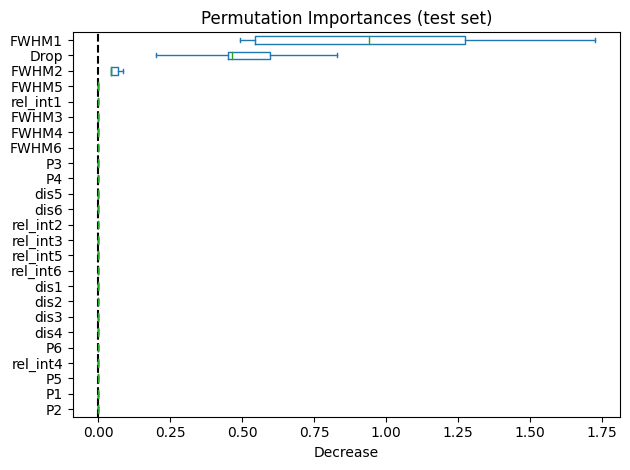

In [27]:
Permutation_importances_test(Voting_reg,78)

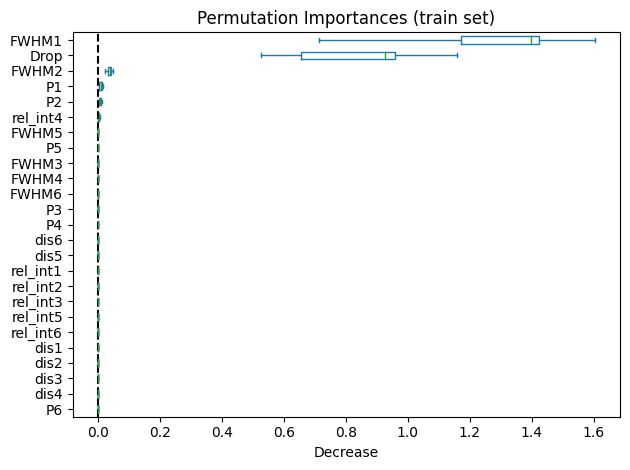

In [28]:
Permutation_importances_train(Voting_reg,78)

In [29]:
params = [
    {'alpha': 0.02792, 'reg_lambda': 0.9345, 'n_estimators': 639, 'learning_rate': 0.04002},
    {'alpha': 0.03854, 'reg_lambda': 0.8201, 'n_estimators': 409, 'learning_rate': 0.03854},
    {'alpha': 0.03368, 'reg_lambda': 0.7221, 'n_estimators': 82, 'learning_rate': 0.192},
    {'alpha': 0.0691, 'reg_lambda': 0.4254, 'n_estimators': 574, 'learning_rate': 0.3446},
    {'alpha': 0.02752, 'reg_lambda': 0.9295, 'n_estimators': 315, 'learning_rate': 0.04316}
]

y_pred=[]
feature_importance=[]

for params in params:
  model = XGBRegressor(**params)
  model.fit(X_train,y_train)
  y_pred.append(model.predict(X_test))
  feature_importance.append(model.feature_importances_)

y_pred_final = np.mean(y_pred, axis=0)
R2_final = r2_score(y_test,y_pred_final)
mse_final = mean_squared_error(y_test,y_pred_final)
mae_final = mean_absolute_error(y_test,y_pred_final)

#feature importance
feature_names = X.columns.tolist()
FI_average = np.mean(feature_importance, axis=0)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': FI_average})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


print(f"Model_final: R2_test:{R2_final}, MSE_test: {mse_final}, MAE_test: {mae_final}")
print('---------------------------------------------------------------------------------------')
print(feature_importance_df)

Model_final: R2_test:0.9576440466089993, MSE_test: 0.021379520440385883, MAE_test: 0.10692314028739928
---------------------------------------------------------------------------------------
     Feature  Importance
1      FWHM1    0.566124
8         P2    0.310658
0       Drop    0.097624
2      FWHM2    0.016590
11        P5    0.005371
16  rel_int4    0.002112
7         P1    0.001508
5      FWHM5    0.000014
23      dis5    0.000000
22      dis4    0.000000
21      dis3    0.000000
20      dis2    0.000000
19      dis1    0.000000
18  rel_int6    0.000000
17  rel_int5    0.000000
12        P6    0.000000
15  rel_int3    0.000000
14  rel_int2    0.000000
13  rel_int1    0.000000
10        P4    0.000000
9         P3    0.000000
6      FWHM6    0.000000
4      FWHM4    0.000000
3      FWHM3    0.000000
24      dis6    0.000000




---



---



In [30]:
#delta(efficiency), Paper2, XRD
Paper2 = pd.read_excel('/content/data.xlsx',sheet_name='Paper2')
Paper2 = Paper2.drop(columns=['delta(eff,9.3)','delta(eff,12)'])
X = Paper2.drop('delta(eff)', axis=1)
y = Paper2['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [31]:
#VotingRegressor, Paper2, XRD
XGB1 = XGBRegressor(alpha=0.05633, reg_lambda=0.9497, n_estimators=594, learning_rate=0.81)
XGB2 = XGBRegressor(alpha=0.12, reg_lambda=0.7488, n_estimators=383, learning_rate=0.61)
XGB3 = XGBRegressor(alpha=0.1669, reg_lambda=0.7, n_estimators=510, learning_rate=0.99)
XGB4 = XGBRegressor(alpha=0.2, reg_lambda=0.6394, n_estimators=660, learning_rate= 1)
XGB5 = XGBRegressor(alpha=0.08, reg_lambda=0.3335, n_estimators=125, learning_rate= 0.9)
XGB6 = XGBRegressor(alpha=0.088, reg_lambda=0.215, n_estimators=654, learning_rate= 0.85)

Voting_reg = VotingRegressor(([('XGB1', XGB1), ('XGB2', XGB2), ('XGB3', XGB3),('XGB4', XGB4),('XGB5', XGB5),('XGB6', XGB6)]))
Voting_reg.fit(X_train, y_train)
metrics(Voting_reg)

R2 Score(Test): 0.96660
R2 Score(Train): 0.99674
MSE(Test): 0.06229
MSE(Train): 0.00482
MAE(Test): 0.22125
MAE(Train): 0.05553
RMSE(Test): 0.24958
RMSE(Train): 0.06943


In [32]:
models = [XGBRegressor(alpha=0.05633, reg_lambda=0.9497, n_estimators=594, learning_rate=0.81),
          XGBRegressor(alpha=0.12, reg_lambda=0.7488, n_estimators=383, learning_rate=0.61),
          XGBRegressor(alpha=0.1669, reg_lambda=0.7, n_estimators=510, learning_rate=0.99),
          XGBRegressor(alpha=0.2, reg_lambda=0.6394, n_estimators=660, learning_rate= 1),
          XGBRegressor(alpha=0.08, reg_lambda=0.3335, n_estimators=125, learning_rate= 0.9),
          XGBRegressor(alpha=0.088, reg_lambda=0.215, n_estimators=654, learning_rate= 0.85)]

for i, model in enumerate(models):
  model.fit(X_train,y_train)
  print('\033[1m' +f"Model{i+1}:"+'\033[0m')
  metrics(model)

Model1:
R2 Score(Test): 0.96382
R2 Score(Train): 0.99875
MSE(Test): 0.06749
MSE(Train): 0.00184
MAE(Test): 0.24335
MAE(Train): 0.03807
RMSE(Test): 0.25979
RMSE(Train): 0.04290
Model2:
R2 Score(Test): 0.96311
R2 Score(Train): 0.99673
MSE(Test): 0.06881
MSE(Train): 0.00483
MAE(Test): 0.23312
MAE(Train): 0.05221
RMSE(Test): 0.26233
RMSE(Train): 0.06949
Model3:
R2 Score(Test): 0.96374
R2 Score(Train): 0.99427
MSE(Test): 0.06764
MSE(Train): 0.00846
MAE(Test): 0.21517
MAE(Train): 0.06828
RMSE(Test): 0.26007
RMSE(Train): 0.09200
Model4:
R2 Score(Test): 0.96469
R2 Score(Train): 0.99138
MSE(Test): 0.06586
MSE(Train): 0.01272
MAE(Test): 0.20298
MAE(Train): 0.08316
RMSE(Test): 0.25664
RMSE(Train): 0.11280
Model5:
R2 Score(Test): 0.97223
R2 Score(Train): 0.99753
MSE(Test): 0.05180
MSE(Train): 0.00365
MAE(Test): 0.20682
MAE(Train): 0.05397
RMSE(Test): 0.22760
RMSE(Train): 0.06043
Model6:
R2 Score(Test): 0.96676
R2 Score(Train): 0.99794
MSE(Test): 0.06200
MSE(Train): 0.00304
MAE(Test): 0.22607
MAE(T

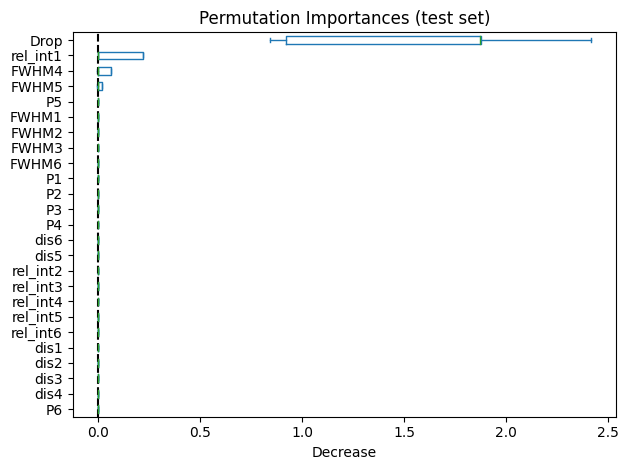

In [33]:
Permutation_importances_test(Voting_reg,78)

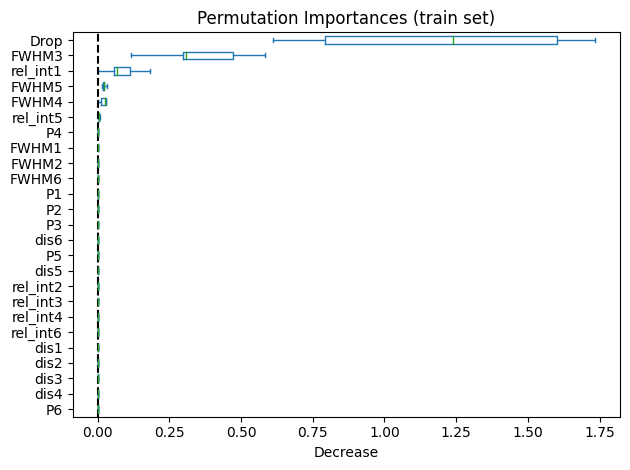

In [34]:
Permutation_importances_train(Voting_reg,78)

In [35]:
params = [
    {'alpha': 0.05633, 'reg_lambda': 0.9497, 'n_estimators': 594, 'learning_rate': 0.81},
    {'alpha': 0.12, 'reg_lambda': 0.7488, 'n_estimators': 383, 'learning_rate': 0.61},
    {'alpha': 0.1669, 'reg_lambda': 0.7, 'n_estimators': 510, 'learning_rate': 0.99},
    {'alpha': 0.2, 'reg_lambda': 0.6394, 'n_estimators': 660, 'learning_rate': 1},
    {'alpha': 0.088, 'reg_lambda': 0.215, 'n_estimators': 654, 'learning_rate': 0.85},
    {'alpha': 0.08, 'reg_lambda': 0.3335, 'n_estimators': 125, 'learning_rate': 0.9}
]

y_pred=[]
feature_importance=[]

for params in params:
  model = XGBRegressor(**params)
  model.fit(X_train,y_train)
  y_pred.append(model.predict(X_test))
  feature_importance.append(model.feature_importances_)

y_pred_final = np.mean(y_pred, axis=0)
R2_final = r2_score(y_test,y_pred_final)
mse_final = mean_squared_error(y_test,y_pred_final)
mae_final = mean_absolute_error(y_test,y_pred_final)

#feature importance
feature_names = X.columns.tolist()
FI_average = np.mean(feature_importance, axis=0)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': FI_average})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)


print(f"Model_final: R2_test:{R2_final}, MSE_test: {mse_final}, MAE_test: {mae_final}")
print('---------------------------------------------------------------------------------------')
print(feature_importance_df)

Model_final: R2_test:0.9666041049762325, MSE_test: 0.06229085829570676, MAE_test: 0.22125234216451647
---------------------------------------------------------------------------------------
     Feature  Importance
3      FWHM3    0.445094
13  rel_int1    0.286939
0       Drop    0.217185
4      FWHM4    0.022709
17  rel_int5    0.021009
5      FWHM5    0.007063
15  rel_int3    0.000000
23      dis5    0.000000
22      dis4    0.000000
21      dis3    0.000000
20      dis2    0.000000
19      dis1    0.000000
18  rel_int6    0.000000
16  rel_int4    0.000000
12        P6    0.000000
14  rel_int2    0.000000
1      FWHM1    0.000000
11        P5    0.000000
10        P4    0.000000
9         P3    0.000000
8         P2    0.000000
7         P1    0.000000
6      FWHM6    0.000000
2      FWHM2    0.000000
24      dis6    0.000000




---



---



In [36]:
#delta(efficiency), Paper1&2 , XRD
Paper1_2 = pd.read_excel('/content/data.xlsx',sheet_name='Paper1&2')
Paper1_2 = Paper1_2.drop(columns=['delta(eff,9.3)','delta(eff,12)'])
X = Paper1_2.drop('delta(eff)', axis=1)
y = Paper1_2['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Voting Regressor, Paper1&2, XRD
XGB1 = XGBRegressor(alpha=0.1401, reg_lambda= 0.152, subsample=0.1192, n_estimators=415, learning_rate=0.4513)
XGB2 = XGBRegressor(alpha=0.2562, reg_lambda= 0.1806, subsample=0.1123, n_estimators=315, learning_rate=0.6608)
XGB3 = XGBRegressor(alpha=0.1404, reg_lambda= 0.1521, subsample=0.1137, n_estimators=268, learning_rate=0.489)
XGB4 = XGBRegressor(alpha=0.259, reg_lambda= 0.2013, subsample=0.13, n_estimators=349, learning_rate=0.6024)
XGB5 = XGBRegressor(alpha=0.1835, reg_lambda= 0.5672, subsample=0.116, n_estimators=240, learning_rate=0.7692)
Voting_reg = VotingRegressor(([('XGB1', XGB1), ('XGB2', XGB2), ('XGB3', XGB3),('XGB4', XGB4),('XGB5', XGB5)]))
Voting_reg.fit(X_train, y_train)
metrics(Voting_reg)

R2 Score(Test): 0.94763
R2 Score(Train): 0.97561
MSE(Test): 0.09378
MSE(Train): 0.02232
MAE(Test): 0.26785
MAE(Train): 0.11079
RMSE(Test): 0.30624
RMSE(Train): 0.14939


In [38]:
models = [XGBRegressor(alpha=0.1401, reg_lambda= 0.152, subsample=0.1192, n_estimators=415, learning_rate=0.4513),
          XGBRegressor(alpha=0.2562, reg_lambda= 0.1806, subsample=0.1123, n_estimators=315, learning_rate=0.6608),
          XGBRegressor(alpha=0.1404, reg_lambda= 0.1521, subsample=0.1137, n_estimators=268, learning_rate=0.489),
          XGBRegressor(alpha=0.259, reg_lambda= 0.2013, subsample=0.13, n_estimators=349, learning_rate=0.6024),
          XGBRegressor(alpha=0.1835, reg_lambda= 0.5672, subsample=0.116, n_estimators=240, learning_rate=0.7692)]

for i, model in enumerate(models):
  model.fit(X_train,y_train)
  print('\033[1m' +f"Model{i+1}:"+'\033[0m')
  metrics(model)

Model1:
R2 Score(Test): 0.93859
R2 Score(Train): 0.97993
MSE(Test): 0.10997
MSE(Train): 0.01837
MAE(Test): 0.29208
MAE(Train): 0.10208
RMSE(Test): 0.33162
RMSE(Train): 0.13554
Model2:
R2 Score(Test): 0.94429
R2 Score(Train): 0.96193
MSE(Test): 0.09976
MSE(Train): 0.03483
MAE(Test): 0.28263
MAE(Train): 0.14165
RMSE(Test): 0.31585
RMSE(Train): 0.18664
Model3:
R2 Score(Test): 0.95068
R2 Score(Train): 0.95530
MSE(Test): 0.08832
MSE(Train): 0.04090
MAE(Test): 0.25352
MAE(Train): 0.13720
RMSE(Test): 0.29719
RMSE(Train): 0.20225
Model4:
R2 Score(Test): 0.91641
R2 Score(Train): 0.94587
MSE(Test): 0.14969
MSE(Train): 0.04953
MAE(Test): 0.34193
MAE(Train): 0.16360
RMSE(Test): 0.38690
RMSE(Train): 0.22256
Model5:
R2 Score(Test): 0.94756
R2 Score(Train): 0.95693
MSE(Test): 0.09391
MSE(Train): 0.03941
MAE(Test): 0.24226
MAE(Train): 0.14363
RMSE(Test): 0.30644
RMSE(Train): 0.19852


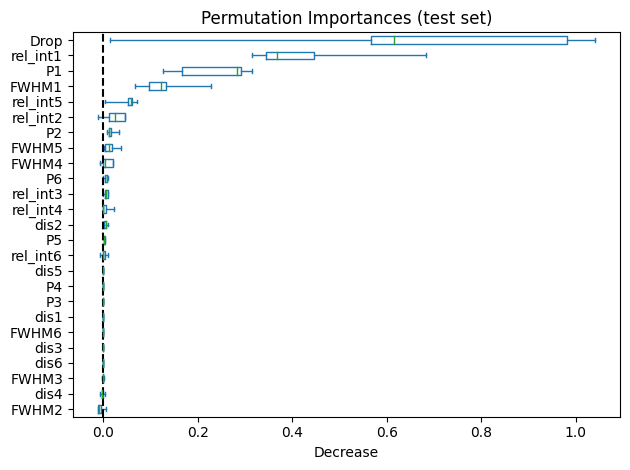

In [39]:
Permutation_importances_test(Voting_reg,42)

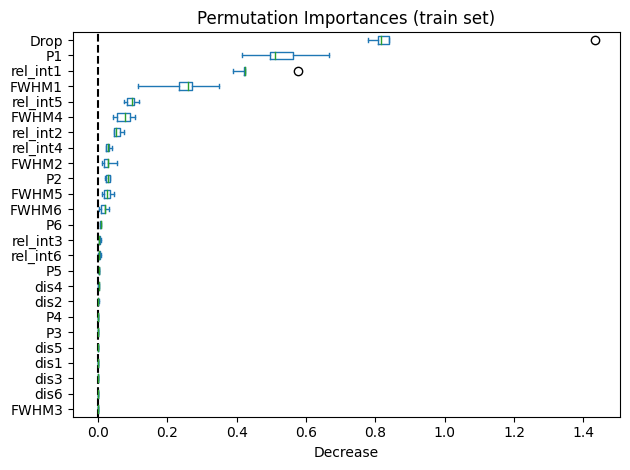

In [40]:
Permutation_importances_train(Voting_reg,42)

In [41]:
params = [
    {'alpha': 0.1401, 'reg_lambda': 0.152, 'subsample': 0.1192, 'n_estimators': 415, 'learning_rate': 0.4513},
    {'alpha': 0.2562, 'reg_lambda': 0.1806, 'subsample': 0.1123, 'n_estimators': 315, 'learning_rate': 0.6608},
    {'alpha': 0.1404, 'reg_lambda': 0.1521, 'subsample': 0.1137, 'n_estimators': 268, 'learning_rate': 0.489},
    {'alpha': 0.259, 'reg_lambda': 0.2013, 'subsample': 0.13, 'n_estimators': 349, 'learning_rate': 0.6024},
    {'alpha': 0.1835, 'reg_lambda': 0.5672, 'subsample': 0.116, 'n_estimators': 240, 'learning_rate': 0.7692}
]

y_pred=[]
feature_importance=[]

for params in params:
  model = XGBRegressor(**params)
  model.fit(X_train,y_train)
  y_pred.append(model.predict(X_test))
  feature_importance.append(model.feature_importances_)

y_pred_final = np.mean(y_pred, axis=0)
R2_final = r2_score(y_test,y_pred_final)
mse_final = mean_squared_error(y_test,y_pred_final)
mae_final = mean_absolute_error(y_test,y_pred_final)


#feature importance
feature_names = X.columns.tolist()
FI_average = np.mean(feature_importance, axis=0)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': FI_average})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

print(f"Model_final: R2_test:{R2_final}, MSE_test: {mse_final}, MAE_test: {mae_final}")
print('-------------------------------------------------------------------------------')
print(feature_importance_df)

Model_final: R2_test:0.9476315036797417, MSE_test: 0.09378434791876072, MAE_test: 0.26785453054640024
-------------------------------------------------------------------------------
     Feature  Importance
17  rel_int5    0.443011
7         P1    0.082934
4      FWHM4    0.072642
13  rel_int1    0.059027
14  rel_int2    0.054253
22      dis4    0.032697
1      FWHM1    0.032141
8         P2    0.026818
15  rel_int3    0.025971
6      FWHM6    0.022875
20      dis2    0.022729
2      FWHM2    0.022078
18  rel_int6    0.021570
0       Drop    0.018633
16  rel_int4    0.017130
5      FWHM5    0.015497
3      FWHM3    0.011655
12        P6    0.010520
11        P5    0.007819
19      dis1    0.000000
10        P4    0.000000
21      dis3    0.000000
9         P3    0.000000
23      dis5    0.000000
24      dis6    0.000000
